In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

# Checking Null Values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

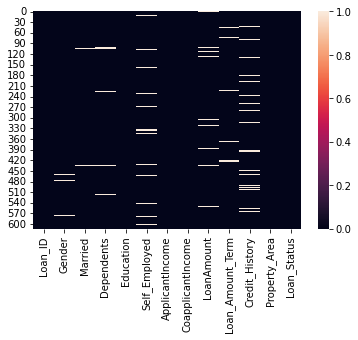

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

# There are so many null values are there

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))

In [8]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

<AxesSubplot:>

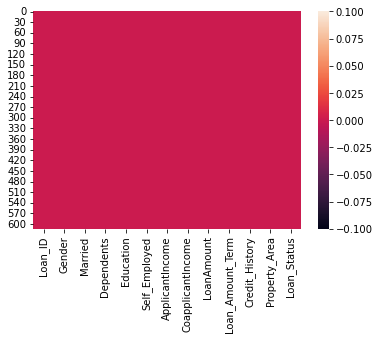

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

So fill all the null values

# let's drop some columns

In [15]:
df=df.drop(["Loan_ID"],axis=1)

In [16]:
df=df.drop(["Gender"],axis=1)

In [17]:
df=df.drop(["Married"],axis=1)

In [18]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [20]:
df["Education"]=Le.fit_transform(df["Education"])

In [21]:
df["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [22]:
df["Self_Employed"]=Le.fit_transform(df["Self_Employed"])

In [23]:
df["Property_Area"]=Le.fit_transform(df["Property_Area"])

In [24]:
df["Loan_Status"]=Le.fit_transform(df["Loan_Status"])

In [25]:
df["Dependents"]=Le.fit_transform(df["Dependents"])

# EDA

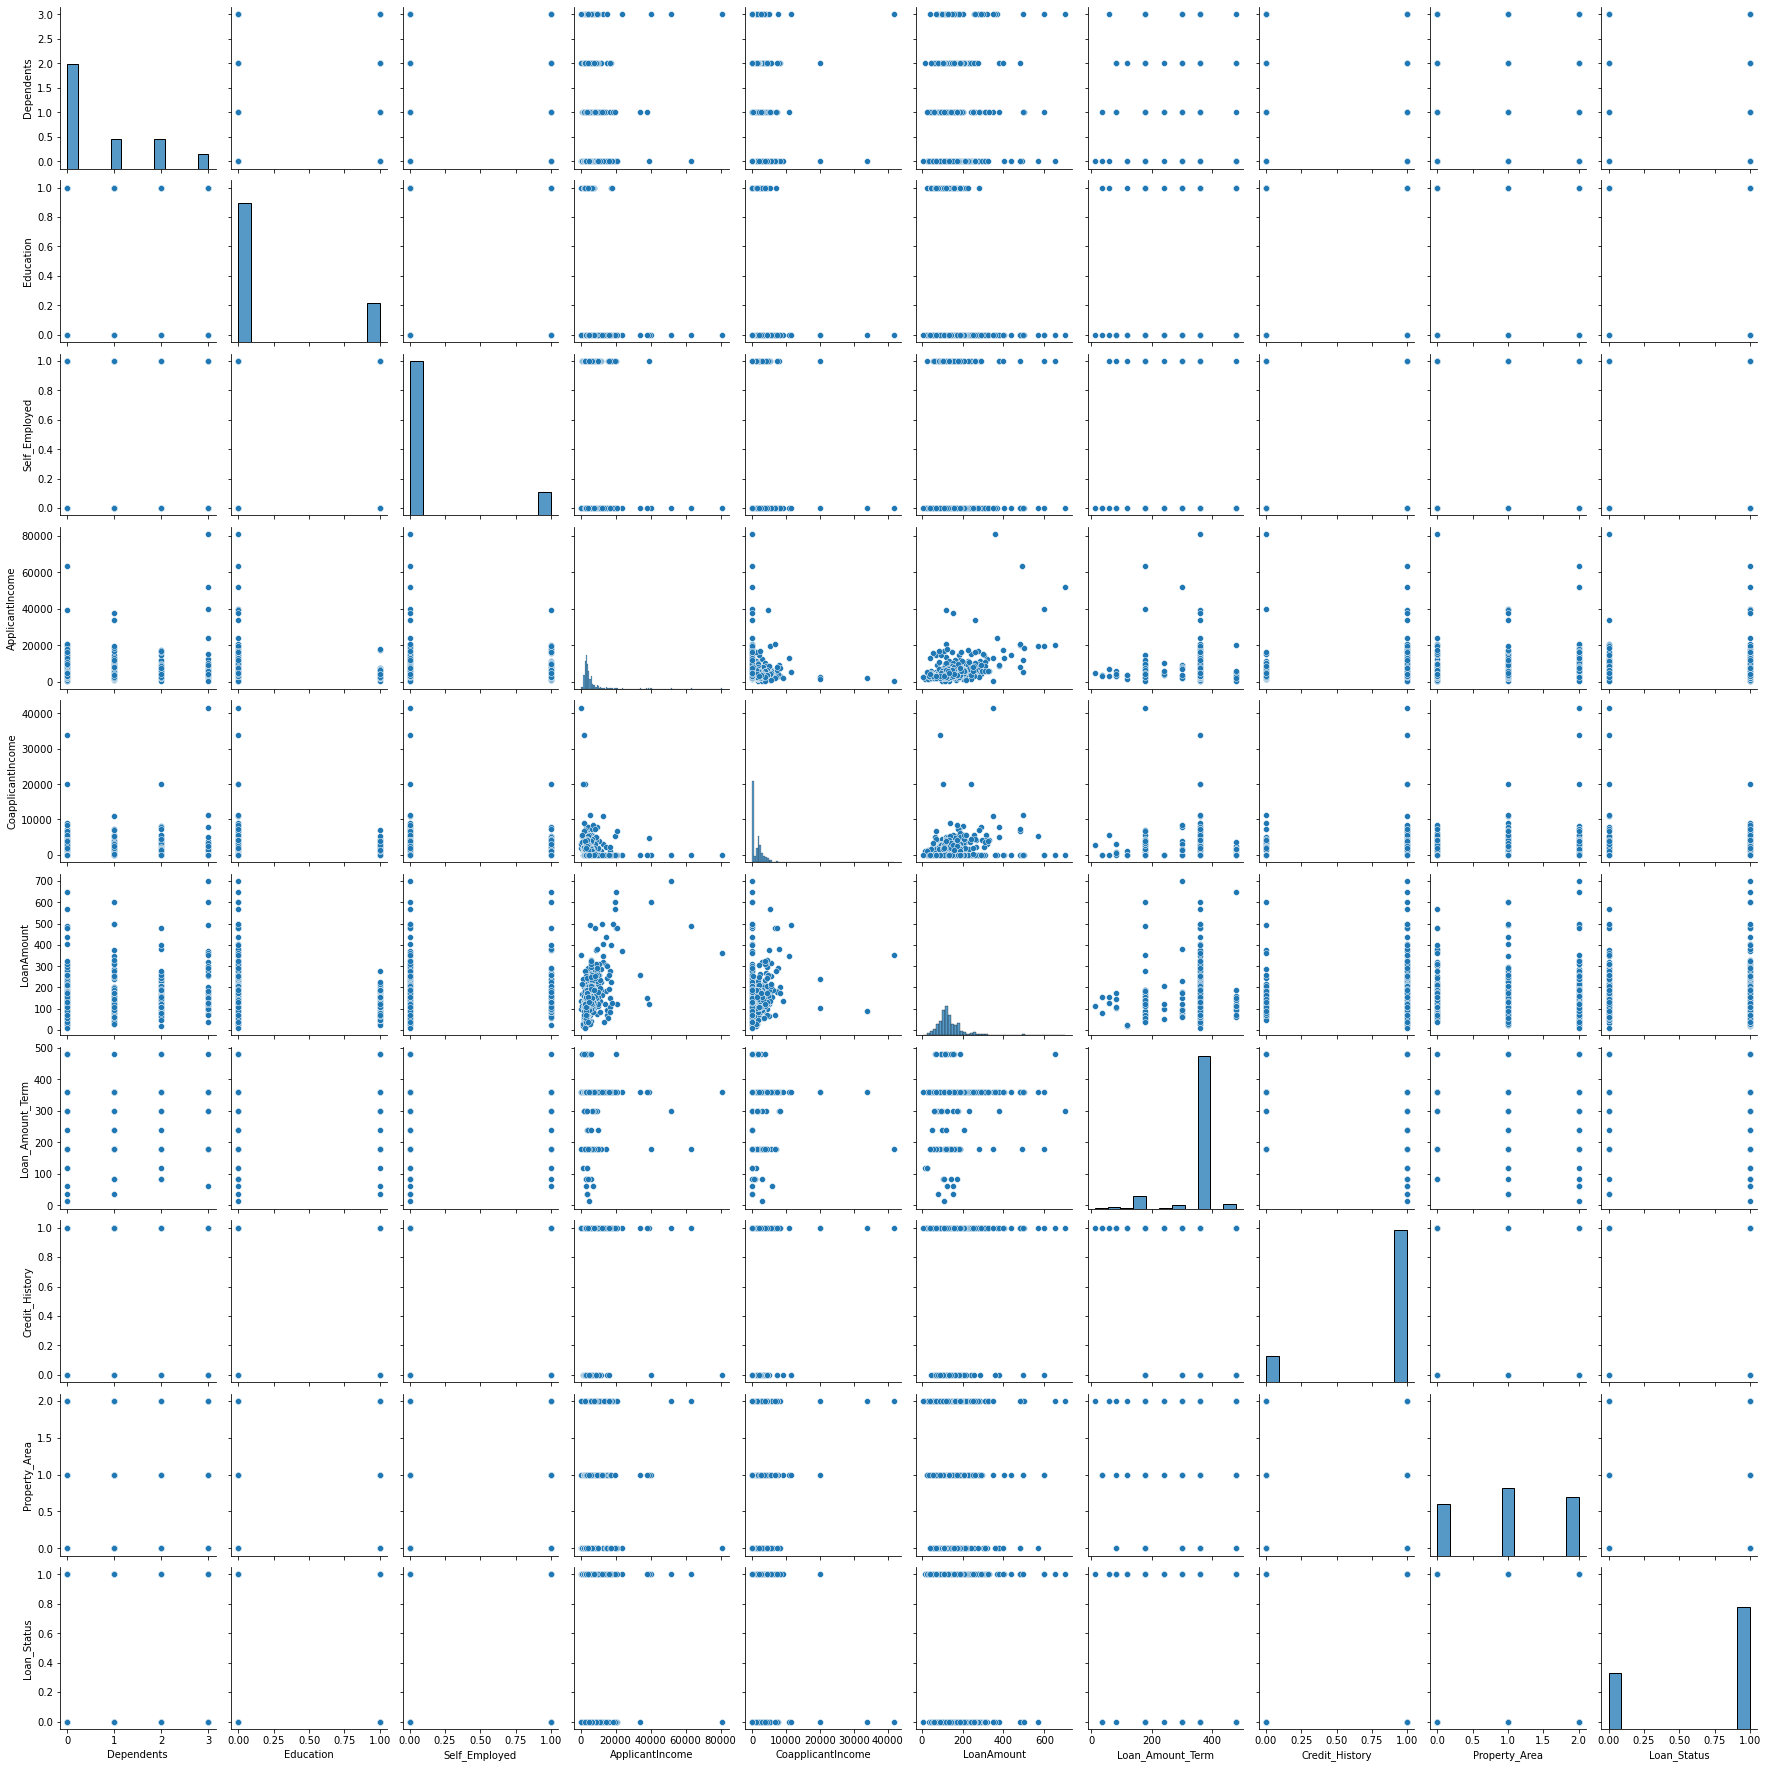

In [26]:
sns.pairplot(df)

# Observations:

In [ ]:
here Loan_Amount_Term and LoanAmount are very nagetive

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

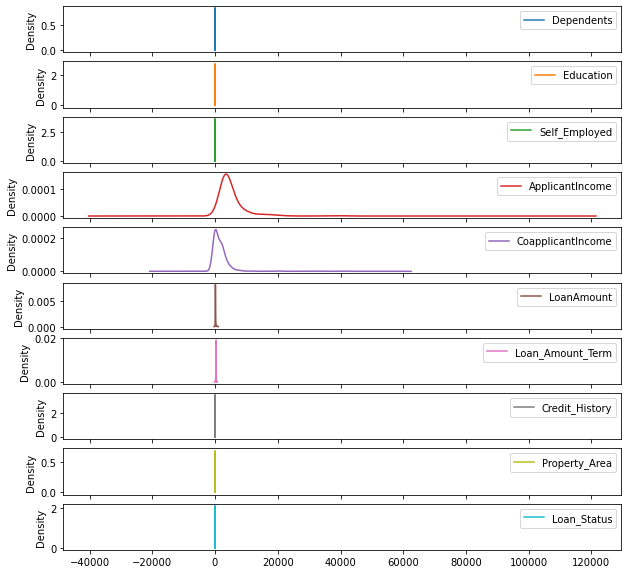

In [27]:
df.plot(kind='kde',subplots=True,figsize=(10,10))

We have seen the data are normally distributed

<AxesSubplot:ylabel='Frequency'>

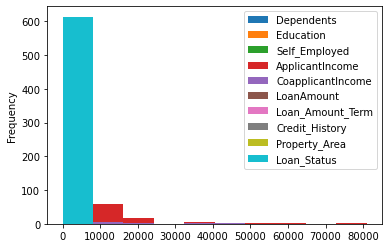

In [29]:
df.plot(kind="hist")

# Correlation

In [30]:
df.corr()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.000244,-0.065243,-0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112
Loan_Status,0.010118,-0.085884,-0.003700,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,0.032112,1.000000


In [31]:
df.corr()["Loan_Status"].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.031808
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Property_Area        0.032112
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

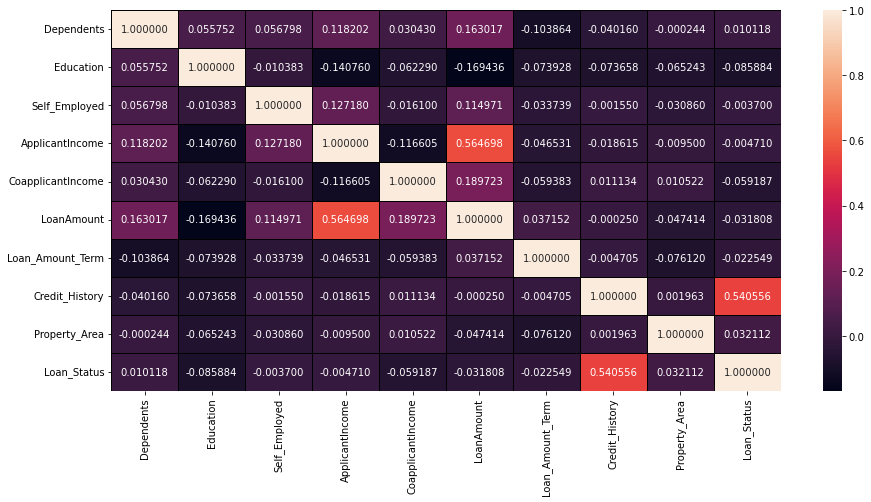

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

Here Loan_Amount_Term,Education,CoapplicantIncome and LoanAmount  are very nagetivly correlated

Dependents and Property_Area   are very weakly correlated 

Credit_History is very strongly correlated

# Describing dataset

In [33]:
df.describe()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


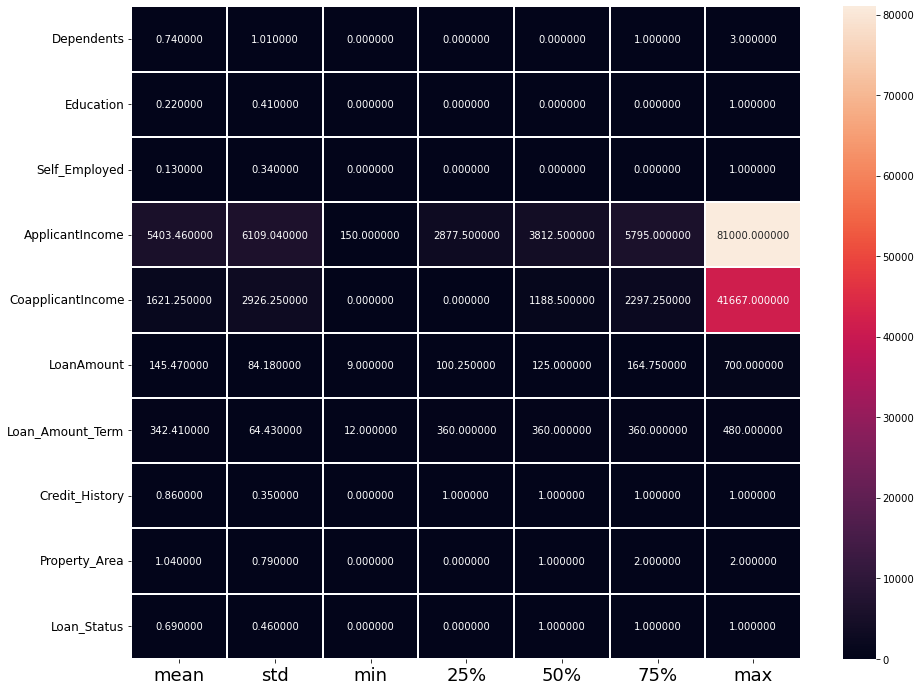

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Observation:

Dependents

mean:0.74

median:0

min:0

Max: 3

Education

mean:0.21

median:0

min:0

Max: 1

Self_Employed

mean:0.13

median:0

min:0

Max: 1

ApplicantIncome	

mean:5403

median:3812

min:150

Max: 81000

CoapplicantIncome

mean:1681

median:1188

min:0

Max: 41667

LoanAmount

mean:145

median:100

min:9

Max: 700

LoanAmount

mean:342

median:360

min:12

Max: 480

LoanAmount

mean:0.85

median:0

min:0

Max: 1

Property_Area

mean:1.03

median:0

min:1

Max: 2

In [35]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]#target column

In [36]:
x

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [37]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [38]:
x.shape

(614, 9)

In [39]:
x.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.745407
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
x_new=power_transform(x)

In [42]:
type(x_new)

numpy.ndarray

In [61]:
x.columns

Index(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

# VIF

Check Multicolinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [64]:
calc_vif()

           variables  VIF FACTOR
0         Dependents    1.584432
1          Education    1.288279
2      Self_Employed    1.176420
3    ApplicantIncome    2.876880
4  CoapplicantIncome    1.468473
5         LoanAmount    6.648871
6   Loan_Amount_Term    9.049950
7     Credit_History    5.909343
8      Property_Area    2.558879


# all values are kind off same so no multicolinearity is present here

# Skewness

In [43]:
sk=x.skew()
sk

Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [44]:
sk[np.abs(sk)>0.5].all()

True

In [45]:
sk[np.abs(sk)<0.5].all()

True

In [46]:
x.skew()[np.abs(x.skew())<0.25].all()

True

In [47]:
x=power_transform(x,method='yeo-johnson')

In [48]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

Skewness  has been removed

# Checking Outlayers

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int32  
 1   Education          614 non-null    int32  
 2   Self_Employed      614 non-null    int32  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int32  
 9   Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1)
memory usage: 36.1 KB


In [50]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

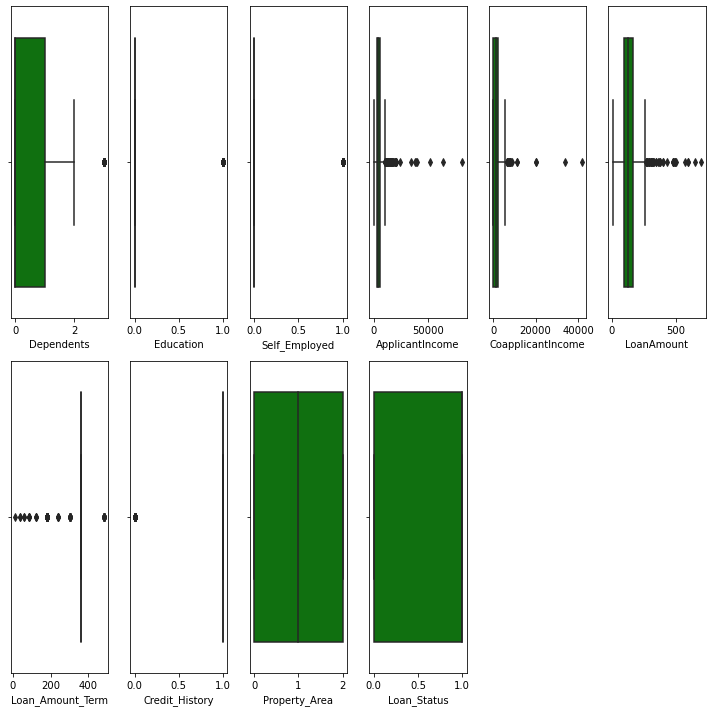

In [51]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(2,6,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

Some outlayers are present

In [52]:
from scipy.stats import zscore

In [53]:
(np.abs(zscore(x))<3).all()

False

In [54]:
z=np.abs(zscore(x))
z.shape

(614, 9)

In [55]:
x.shape

(614, 9)

In [56]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
       443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64), array([5, 6, 5, 6, 5, 6, 5, 3, 5, 6, 3, 5, 6, 3, 3, 3, 6, 6, 6, 6, 3, 6,
       6, 5, 6, 3, 3, 3, 3, 6, 6, 5, 5, 5, 6, 3], dtype=int64))


In [57]:
x_new_z=df[(z<3).all(axis=1)]
x_new_z

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [58]:
x_new_z.shape

(582, 10)

# Data loss

In [59]:
(614-582)/614*100

5.211726384364821

# 5% data has removed

# Let's Trainning the data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [61]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        39
           1       0.76      1.00      0.87        84

    accuracy                           0.79       123
   macro avg       0.88      0.67      0.68       123
weighted avg       0.84      0.79      0.75       123

0.7886178861788617
[[13 26]
 [ 0 84]]


here accuracy score is 78 and  true positive and true nagetive rate is 13 and 84

# DTC

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 72.35772357723577
[[22 17]
 [17 67]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        39
           1       0.80      0.80      0.80        84

    accuracy                           0.72       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.72      0.72      0.72       123



here accuracy score is 73 and ture positive and true nagetive rate is 21 and 69

# RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 78.04878048780488
[[15 24]
 [ 3 81]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.77      0.96      0.86        84

    accuracy                           0.78       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.79      0.78      0.75       123



here accuracy score is 80 and true positive and true nagetive rate is 17 and 82

# SVC

In [68]:
from sklearn.svm import SVC

In [69]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 79.67479674796748
[[14 25]
 [ 0 84]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        39
           1       0.77      1.00      0.87        84

    accuracy                           0.80       123
   macro avg       0.89      0.68      0.70       123
weighted avg       0.84      0.80      0.76       123



here accuracy score is 79 and true positive and true nagetive rate is 14 and 84

# Let's check cv ...and see model is overfitted or not

In [70]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [71]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.7866586698653871


# SVC

In [72]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 0.809462881514061


# LogisticModel

In [73]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 0.809462881514061


Cv for RandomForestClassifier

In [74]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.809462881514061 
The accuracy score is:- [0.77235772 0.72357724 0.81300813 0.82926829 0.79508197]


CV for SVC

In [75]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.809462881514061 
The accuracy score is:- [0.77235772 0.72357724 0.81300813 0.82926829 0.79508197]


CV for LR

In [76]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 0.809462881514061 
The accuracy score is:- [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]


# Hyperparameter Tunning

In [77]:
RandomForestClassifier()

RandomForestClassifier()

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [80]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}

In [81]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [82]:
GCV.best_estimator_

RandomForestClassifier(max_depth=7, max_features='log2')

In [83]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7886178861788617

Soo model is performing well

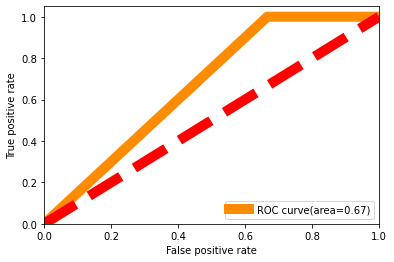

In [88]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='red',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [85]:
import pickle
filename="Loan_Application.pkl"
pickle.dump(lr,open(filename,'wb'))

In [86]:
loaded_model=pickle.load(open('Loan_Application.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [87]:
results

0.7886178861788617

# conclusion

In [89]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])

In [90]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
Predicted,1,0,1,1,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
Orginal,1,0,1,1,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
